## Dataset Description

The IMDB Movie Reviews dataset is a widely used benchmark dataset for sentiment analysis in Natural Language Processing (NLP).
It consists of movie reviews written by users on the IMDB platform along with their corresponding sentiment labels.

The dataset contains textual data in the form of movie reviews and a binary target variable indicating the sentiment of each review.
Each review is labeled as either positive or negative.

This dataset is suitable for supervised learning tasks, especially text classification problems.


## Dataset Features

The dataset contains the following columns:

- **review**  
  This column contains the raw text of the movie review written by the user.

- **sentiment**  
  This column represents the sentiment of the review.
  - positive indicates a favorable review
  - negative indicates an unfavorable review


## Problem Statement

Movie reviews contain unstructured text data that is difficult to analyze manually at scale.
Understanding user sentiment from large volumes of textual reviews is important for businesses and platforms to evaluate customer opinions and improve their services.

The challenge is to automatically classify a given movie review as positive or negative based solely on the text content of the review.


## Objective of the Project

The main objective of this project is to build a sentiment analysis model that can accurately classify IMDB movie reviews as either positive or negative using Natural Language Processing techniques.

The specific objectives are:
- To preprocess and clean raw text data
- To convert text data into numerical features using vectorization techniques
- To build and train machine learning models for sentiment classification
- To evaluate the performance of the models using appropriate metrics


## Type of Problem

This project is a:
- Natural Language Processing (NLP) problem
- Binary Classification problem
- Supervised Machine Learning problem


## Expected Outcome

At the end of this project, the model should be able to:
- Take a new movie review as input
- Analyze the textual content
- Predict whether the sentiment of the review is positive or negative


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the datset
df=pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
## lets understand the data
df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


In [ ]:
df['review_length'] = df['review'].apply(len)
df.groupby('sentiment')['review_length'].mean()


,review_length
sentiment,
negative,1294.06436
positive,1324.79768


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df[['review', 'sentiment']].sample(10)



,review,sentiment
10786,"This movie looked like it was rushed to release for some reason. Definitely not a well made movie. So unbelievable. The scenes where the President (Holbrook) were downtown and walking among the people were a farce. There would not be a chance for the common folk to be within 30 yards of the President in that situation in real life. If it wasn't for the blood and profanity, this was shot like a TV movie. It could have been decent if it was done differently. Holbrook's (President) talents were never realized in this movie. Shatner's acting is okay. The production values in this movie leave a lot to be desired. Overall, I think most people would be better off not wasting time to watch this affair.",negative
9212,"I'm a dance teacher and was looking forward to some good dance routines in this film. How sad to have been subjected to such a painful experience. <br /><br />I had major problems with Jennifer Beals and her character. I found Alex extremely repellent. Beals' face is so young, sweet and innocent, and this very incongruous with Alex's very disturbing lewdness, especially in that disgusting restaurant scene. She also has the temper tantrums of a toddler. It is very difficult to believe that Nick would keep coming back to such a moody teenager after her frequent rantings and ravings, especially after she opens the door of a moving car and chucks a stiletto at him, opting rather to walk home - in the middle of the road - with only one shoe!!!. And what about after her idiotic behaviour after the night at the ballet. In fact, the whole romance was very disturbing - the 30 something year old man going after a girl who looks about 16. Yuck. <br /><br />As for the dancing, I'm afraid this 80s style is totally dated. What on earth was that TV dance sequence about in the club? Who was supposed to be dancing? I wasn't even sure if it was a woman or a man in drag! And even that famous final sequence is pretty disappointing, especially given the context of an audition for a ballet company. The camera shots of her leap actually ruin it's effect because you can't see what she's doing. And what on earth was she doing when she went past each of the panel pointing at them? And as many other comments have pointed out, she would NEVER get into a ballet company on the strength of that audition - perhaps that's why they don't actually say at the end whether she was successful or not, the closure is the fact that she overcame her fear in the end. Of the 'Flashdancers', I actually thought the best sequence belonged to Cynthia Rhodes (Penny in Dirty Dancing). You could see that she was a real dancer, and her acrobatics were very impressive. This is of course if you can get past her appalling costume and makeup. <br /><br />There were two good bits in this film - the ballet dancers stretching when Alex goes for the first time to apply for an audition - they look so lovely and classy, and at least this helps to underline the difference between her current dance career and the one she aspires to. The other good scene was the break dancing in the street. I also liked the ice skater's parents, they were funny.<br /><br />Some other random points - who was Hanna and how did Alex get to know her? What was an 18 year old doing living in a converted warehouse all alone? How did she afford that lovely barre and all the furniture?Where were her family? Was that scene in the 'nude' club really necessary? The person who wrote in their comment that it was something like a Disney film needs their head examined. And anyway, what happened to the ice skater? <br /><br />Many people said the film was poor but they liked the message - don't give up hope, keep on trying, and your dreams will come true. Watch ""The Little Mermaid"" instead.",negative
39884,"*Possible Spoiler*<br /><br />'Return to Cabin by the Lake' is a useless movie. The acting was not good and the plot wasn't even remotely interesting.<br /><br />'Cabin by the Lake' is a g

## steps to be followed
1. Text cleaning and noise removal
2. Tokenization
3. Stopword removal
4. Lemmatization
5. N-gram creation (optional)
6. Text vectorization using TF-IDF
7. Train-test split
8. Model building
9. Model evaluation


## Text cleaning and noise removal

In [ ]:
import regex as re

In [ ]:
x=df['review']
y=df['sentiment']

In [ ]:
x=x.str.lower()

In [ ]:
x=x.apply(lambda x:re.sub(r'[^a-zA-Z ]',' ',x))
x=x.apply(lambda x:re.sub(r'\bbr\b','',x))

In [ ]:
x.head()

,review
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side
1,a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you re going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected t

## Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
x=x.apply(lambda x:word_tokenize(x))
x

,review
0,"[one, of, the, other, reviewers, has, mentioned, that, after, watching, just, oz, episode, you, ll, be, hooked, they, are, right, as, this, is, exactly, what, happened, with, me, the, first, thing, that, struck, me, about, oz, was, its, brutality, and, unflinching, scenes, of, violence, which, set, in, right, from, the, word, go, trust, me, this, is, not, a, show, for, the, faint, hearted, or, timid, this, show, pulls, no, punches, with, regards, to, drugs, sex, or, violence, its, is, hardcore, in, the, classic, use, of, the, word, it, is, called, oz, as, that, is, the, nickname, given, to, the, oswald, ...]"
1,"[a, wonderful, little, production, the, filming, technique, is, very, unassuming, very, old, time, bbc, fashion, and, gives, a, comforting, and, sometimes, discomforting, sense, of, realism, to, the, entire, piece, the, actors, are, extremely, well, chosen, michael, sheen, not, only, has, got, all, the, polari, but, he, has, all, the, voices, down, pat, too, you, can, truly, see, the, seamless, editing, guided, by, the, references, to, williams, diary, entries, not, only, is, it, well, worth, the, watching, but, it, is, a, terrificly, written, and, performed, piece, a, masterful, production, about, one, of, the, great, master, s, of, comedy, and, his, life, ...]"
2,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, watching, a, light, hearted, comedy, the, plot, is, simplistic, but, the, dialogue, is, witty, and, the, characters, are, likable, even, the, well, bread, suspected, serial, killer, while, some, may, be, disappointed, when, they, realize, this, is, not, match, point, risk, addiction, i, thought, it, was, proof, that, woody, allen, is, still, fully, in, control, of, the, style, many, of, us, have, grown, to, love, this, was, the, most, i, d, laughed, at, one, of, woody, s, comedies, ...]"
3,"[basically, there, s, a, family, where, a, little, boy, jake, thinks, there, s, a, zombie, in, his, closet, his, parents, are, fighting, all, the, time, this, movie, is, slower, than, a, soap, opera, and, suddenly, jake, decides, to, become, rambo, and, kill, the, zombie, ok, first, of, all, when, you, re, going, to, make, a, film, you, must, decide, if, its, a, thriller, or, a, drama, as, a, drama, the, movie, is, watchable, parents, are, divorcing, arguing, like, in, real, life, and, then, we, have, jake, with, his, closet, which, totally, ruins, all, the, film, i, expected, to, see, a, ...]"
4,"[petter, mattei, s, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, mr, mattei, offers, us, a, vivid, portrait, about, human, relations, this, is, a, movie, that, seems, to, be, telling, us, what, money, power, and, success, do, to, people, in, the, different, situations, we, encounter, this, being, a, variation, on, the, arthur, schnitzler, s, play, about, the, same, theme, the, director, transfers, the, action, to, the, present, time, new, york, where, all, these, different, characters, meet, and, connect, each, one, is, connected, in, one, way, or, another, to, the, next, person, but, no, one, seems, ...]"
...,...
49995,"[i, thought, this, movie, did, a, down, right, good, job, it, wasn, t, as, creative, or, original, as, the, first, but, who, was, expecting, it, to, be, it, was, a, whole, lotta, fun, the, more, i, think, about, it, the, more, i, like, it, and, when, it, comes, out, on, dvd, i, m, going, to, pay, the, money, for, it, very, proudly, every, last, cent, sharon, stone, is, great, she, always, is, even, if, her, movie, is, horrible, catwoman, but, this, movie, isn, t, this, is, one, of, those, movies, that, will, be, underrated, for, its, lifetime, and, it, will, ...]"
49996,"[bad, plot, bad, dialogue, bad, acting, idiotic, directing, the, annoying, porn, groove, soundtrack, that, ran, continually, over, the, overacted, script, and, a, crappy, copy, of, the, vhs, can, not, be, redeem

## Stopword removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
x.apply(lambda x:[word for word in x if word not in stop_words])


,review
0,"[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, word, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, goes, shows, dare, forget, pretty, pictures, painted, mainstream, audiences, forget, ...]"
1,"[wonderful, little, production, filming, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, got, polari, voices, pat, truly, see, seamless, editing, guided, references, williams, diary, entries, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, master, comedy, life, realism, really, comes, home, little, things, fantasy, guard, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, concerning, orton, halliwell, sets, particularly, flat, halliwell, murals, decorating, every, surface, terribly, well, done]"
2,"[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watching, light, hearted, comedy, plot, simplistic, dialogue, witty, characters, likable, even, well, bread, suspected, serial, killer, may, disappointed, realize, match, point, risk, addiction, thought, proof, woody, allen, still, fully, control, style, many, us, grown, love, laughed, one, woody, comedies, years, dare, say, decade, never, impressed, scarlet, johanson, managed, tone, sexy, image, jumped, right, average, spirited, young, woman, may, crown, jewel, career, wittier, devil, wears, prada, interesting, superman, great, comedy, go, see, friends]"
3,"[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, become, rambo, kill, zombie, ok, first, going, make, film, must, decide, thriller, drama, drama, movie, watchable, parents, divorcing, arguing, like, real, life, jake, closet, totally, ruins, film, expected, see, boogeyman, similar, movie, instead, watched, drama, meaningless, thriller, spots, well, playing, parents, descent, dialogs, shots, jake, ignore]"
4,"[petter, mattei, love, time, money, visually, stunning, film, watch, mr, mattei, offers, us, vivid, portrait, human, relations, movie, seems, telling, us, money, power, success, people, different, situations, encounter, variation, arthur, schnitzler, play, theme, director, transfers, action, present, time, new, york, different, characters, meet, connect, one, connected, one, way, another, next, person, one, seems, know, previous, point, contact, stylishly, film, sophisticated, luxurious, look, taken, see, people, live, world, live, habitat, thing, one, gets, souls, picture, different, stages, loneliness, one, inhabits, big, city, exactly, best, place, human, relations, find, sincere, fulfillment, one, discerns, case, people, encounter, acting, good, mr, mattei, direction, steve, ...]"
...,...
49995,"[thought, movie, right, good, job, creative, original, first, expecting, whole, lotta, fun, think, like, comes, dvd, going, pay, money, proudly, every, last, cent, sharon, stone, great, always, even, movie, horrible, catwoman, movie, one, movies, underrated, lifetime, probably, become, classic, like, yrs, wait, classic, watch, enjoy, expect, masterpiece, something, thats, gripping, soul, touching, allow, get, life, get, involved, movie, entertaining, recommend, peo

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
le=WordNetLemmatizer()

In [ ]:
x=x.apply(lambda x:[le.lemmatize(word) for word in x])

In [ ]:
x

,review
0,"[one, of, the, other, reviewer, ha, mentioned, that, after, watching, just, oz, episode, you, ll, be, hooked, they, are, right, a, this, is, exactly, what, happened, with, me, the, first, thing, that, struck, me, about, oz, wa, it, brutality, and, unflinching, scene, of, violence, which, set, in, right, from, the, word, go, trust, me, this, is, not, a, show, for, the, faint, hearted, or, timid, this, show, pull, no, punch, with, regard, to, drug, sex, or, violence, it, is, hardcore, in, the, classic, use, of, the, word, it, is, called, oz, a, that, is, the, nickname, given, to, the, oswald, ...]"
1,"[a, wonderful, little, production, the, filming, technique, is, very, unassuming, very, old, time, bbc, fashion, and, give, a, comforting, and, sometimes, discomforting, sense, of, realism, to, the, entire, piece, the, actor, are, extremely, well, chosen, michael, sheen, not, only, ha, got, all, the, polari, but, he, ha, all, the, voice, down, pat, too, you, can, truly, see, the, seamless, editing, guided, by, the, reference, to, williams, diary, entry, not, only, is, it, well, worth, the, watching, but, it, is, a, terrificly, written, and, performed, piece, a, masterful, production, about, one, of, the, great, master, s, of, comedy, and, his, life, ...]"
2,"[i, thought, this, wa, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, watching, a, light, hearted, comedy, the, plot, is, simplistic, but, the, dialogue, is, witty, and, the, character, are, likable, even, the, well, bread, suspected, serial, killer, while, some, may, be, disappointed, when, they, realize, this, is, not, match, point, risk, addiction, i, thought, it, wa, proof, that, woody, allen, is, still, fully, in, control, of, the, style, many, of, u, have, grown, to, love, this, wa, the, most, i, d, laughed, at, one, of, woody, s, comedy, ...]"
3,"[basically, there, s, a, family, where, a, little, boy, jake, think, there, s, a, zombie, in, his, closet, his, parent, are, fighting, all, the, time, this, movie, is, slower, than, a, soap, opera, and, suddenly, jake, decides, to, become, rambo, and, kill, the, zombie, ok, first, of, all, when, you, re, going, to, make, a, film, you, must, decide, if, it, a, thriller, or, a, drama, a, a, drama, the, movie, is, watchable, parent, are, divorcing, arguing, like, in, real, life, and, then, we, have, jake, with, his, closet, which, totally, ruin, all, the, film, i, expected, to, see, a, ...]"
4,"[petter, mattei, s, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, mr, mattei, offer, u, a, vivid, portrait, about, human, relation, this, is, a, movie, that, seems, to, be, telling, u, what, money, power, and, success, do, to, people, in, the, different, situation, we, encounter, this, being, a, variation, on, the, arthur, schnitzler, s, play, about, the, same, theme, the, director, transfer, the, action, to, the, present, time, new, york, where, all, these, different, character, meet, and, connect, each, one, is, connected, in, one, way, or, another, to, the, next, person, but, no, one, seems, ...]"
...,...
49995,"[i, thought, this, movie, did, a, down, right, good, job, it, wasn, t, a, creative, or, original, a, the, first, but, who, wa, expecting, it, to, be, it, wa, a, whole, lotta, fun, the, more, i, think, about, it, the, more, i, like, it, and, when, it, come, out, on, dvd, i, m, going, to, pay, the, money, for, it, very, proudly, every, last, cent, sharon, stone, is, great, she, always, is, even, if, her, movie, is, horrible, catwoman, but, this, movie, isn, t, this, is, one, of, those, movie, that, will, be, underrated, for, it, lifetime, and, it, will, ...]"
49996,"[bad, plot, bad, dialogue, bad, acting, idiotic, directing, the, annoying, porn, groove, soundtrack, that, ran, continually, over, the, overacted, script, and, a, crappy, copy, of, the, vhs, can, not, be, redeemed, by, consuming, liquor, trust, me, because, i

In [ ]:
x=x.apply(lambda x:' '.join(x))

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((40000,), (10000,), (40000,), (10000,))

## Text vectorization using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
crashed_code ='''vect=TfidfVectorizer()
xtrain_tf=vect.fit_transform(xtrain)
xtest_tf=vect.transform(xtest)
xtrain_v=pd.DataFrame(xtrain_tf.toarray(),columns=vect.get_feature_names_out())
xtest_v=pd.DataFrame(xtest_tf.toarray(),columns=vect.get_feature_names_out())'''


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000)

xtrain_tf = vect.fit_transform(xtrain)
xtest_tf = vect.transform(xtest)


## Baseline Models


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(xtrain_tf,ytrain)
ypred=model.predict(xtest_tf)




In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
summary1=pd.DataFrame(columns=['Name','accuracy','precision','Recall','f1score'])

In [ ]:
def metrics(name,ytest,ypred):
    global summary1
    print(classification_report(ytest,ypred))
    # Specify 'positive' as the positive label for binary classification
    acc=accuracy_score(ytest,ypred)
    pre=precision_score(ytest,ypred)
    rec=recall_score(ytest,ypred)
    f1=f1_score(ytest,ypred)

    result=pd.DataFrame({'Name':[name],'accuracy':[acc],'precision':[pre],'Recall':[rec],'f1score':[f1]})
    summary1=pd.concat([summary1,result],ignore_index=True)

    return summary1

In [ ]:
ypred

array(['negative', 'negative', 'positive', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [ ]:
metrics('logistic-regression-basemodel',ytest,ypred)

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/tmp/ipython-input-2974765592.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary1=pd.concat([summary1,result],ignore_index=True)


,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model1= MultinomialNB()
model1.fit(xtrain_tf, ytrain)
ypred1=model1.predict(xtest_tf)
metrics('naive-bayes-miltinomial',ytest,ypred1)


              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214


In [ ]:
ytrain_encoded=pd.get_dummies(ytrain,drop_first=True).astype(int)
ytest_encoded=pd.get_dummies(ytest,drop_first=True).astype(int)

In [ ]:
from xgboost import XGBClassifier

model2=XGBClassifier()
model2.fit(xtrain_tf,ytrain_encoded)
ypred2=model2.predict(xtest_tf)
metrics('xgboost',ytest_encoded,ypred2)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5000
           1       0.85      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214
2,random-forest,0.8471,0.852529,0.8394,0.845914
3,"logistic-regression-(1, 1)",0.8914,0.886759,0.8974,0.892048
4,"logistic-regression-(1, 2)",0.8946,0.889921,0.9006,0.895229
5,"logistic-regression-(1, 3)",0.8949,0.890913,0.9000,0.895433
6,final-model,0.8741,0.862852,0.8896,0.876022
7,svm,0.8872,0.883366,0.8922,0.887761
8,tf-idf tuned,0.9005,0.896142,0.9060,0.901044
9,xgboost,0.8605,0.851433,0.8734,0.862277


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier()
model3.fit(xtrain_tf,ytrain)
ypred3=model3.predict(xtest_tf)


In [ ]:
metrics('random-forest',ytest,ypred3)

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      5000
    positive       0.85      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214
2,random-forest,0.8471,0.852529,0.8394,0.845914


In [ ]:
settings = [(1,1), (1,2), (1,3)]

for ng in settings:
    vect = TfidfVectorizer(max_features=5000, ngram_range=ng)
    xtrain_tf1 = vect.fit_transform(xtrain)
    xtest_tf1 = vect.transform(xtest)

    model = LogisticRegression(max_iter=1000)
    model.fit(xtrain_tf1, ytrain)
    ypred = model.predict(xtest_tf1)
    metrics(f'logistic-regression-{ng}', ytest, ypred)



              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 2, 5],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(xtrain_tf, ytrain)
grid.best_params_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
final_model = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000
)

final_model.fit(xtrain_tf, ytrain)
ypred4=final_model.predict(xtest_tf)
metrics('final-model',ytest,ypred4)


              precision    recall  f1-score   support

    negative       0.89      0.86      0.87      5000
    positive       0.86      0.89      0.88      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214
2,random-forest,0.8471,0.852529,0.8394,0.845914
3,"logistic-regression-(1, 1)",0.8914,0.886759,0.8974,0.892048
4,"logistic-regression-(1, 2)",0.8946,0.889921,0.9006,0.895229
5,"logistic-regression-(1, 3)",0.8949,0.890913,0.9000,0.895433
6,final-model,0.8741,0.862852,0.8896,0.876022


In [ ]:
from sklearn.svm import LinearSVC

model5=LinearSVC(C=1.0)
model5.fit(xtrain_tf,ytrain)
ypred5=model5.predict(xtest_tf)
metrics('svm',ytest,ypred5)

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5000
    positive       0.88      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214
2,random-forest,0.8471,0.852529,0.8394,0.845914
3,"logistic-regression-(1, 1)",0.8914,0.886759,0.8974,0.892048
4,"logistic-regression-(1, 2)",0.8946,0.889921,0.9006,0.895229
5,"logistic-regression-(1, 3)",0.8949,0.890913,0.9000,0.895433
6,final-model,0.8741,0.862852,0.8896,0.876022
7,svm,0.8872,0.883366,0.8922,0.887761


In [ ]:
vect = TfidfVectorizer(max_features=8000,min_df=5, max_df=0.9,ngram_range=(1,2) )
xtrain_tf2 = vect.fit_transform(xtrain)
xtest_tf2 = vect.transform(xtest)
model6 = LogisticRegression(max_iter=1000)
model6.fit(xtrain_tf2, ytrain)
ypred6 = model6.predict(xtest_tf2)
metrics('tf-idf tuned',ytest,ypred6)

              precision    recall  f1-score   support

    negative       0.90      0.90      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



,Name,accuracy,precision,Recall,f1score
0,logistic-regression-basemodel,0.8914,0.886759,0.8974,0.892048
1,naive-bayes-miltinomial,0.8527,0.850248,0.8562,0.853214
2,random-forest,0.8471,0.852529,0.8394,0.845914
3,"logistic-regression-(1, 1)",0.8914,0.886759,0.8974,0.892048
4,"logistic-regression-(1, 2)",0.8946,0.889921,0.9006,0.895229
5,"logistic-regression-(1, 3)",0.8949,0.890913,0.9000,0.895433
6,final-model,0.8741,0.862852,0.8896,0.876022
7,svm,0.8872,0.883366,0.8922,0.887761
8,tf-idf tuned,0.9005,0.896142,0.9060,0.901044


##  Neural Network Model

In [ ]:
## There are two libraries that can be used for deep learning
## tensorflow and pytorch

from tensorflow.keras import Sequential,regularizers # Deep learning model
from tensorflow.keras.layers import Dense,Dropout # used to create layers in DEEP learning model

In [ ]:
## lets desing the neural network
model=Sequential()

# we will add the input layer and first hidden layer
model.add(Dense(150,input_shape=(5000,),activation='relu'))
model.add(Dropout(0.3))


## now lets add second hidden layer

model.add(Dense(75,activation='relu'))
model.add(Dropout(0.3))

## lets add third hidden layer
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))

## now lets add output layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 150)            │       750,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 765,326 (2.92 MB)

 Trainable params: 765,326 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# lets count the weights(number of parameters)
print('1st hidden layer',150*5000+150)
print('2nd hidden layer',75*150+75)
print('3rd hidden layer',50*75+50)
print('output layer',50*1+1)

1st hidden layer 750150
2nd hidden layer 11325
3rd hidden layer 3800
output layer 51


In [ ]:
## We need to compile the model
## in case of regeression loss='RMSE'
## in case of binary classification loss='binary_crossentropy'
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
## Lets Train the model
model.fit(xtrain_tf1,ytrain_encoded,epochs=15,batch_size=8000)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5574 - loss: 0.6908
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7557 - loss: 0.6642
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7982 - loss: 0.6045
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8202 - loss: 0.5195
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8410 - loss: 0.4274
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8572 - loss: 0.3536
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8734 - loss: 0.3127
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8869 - loss: 0.2848
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8985 - loss: 0.2640
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9079 - loss: 0.2450
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9125 - loss: 0.2330
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9195 - loss: 0.2208
Epoch 13/15
5

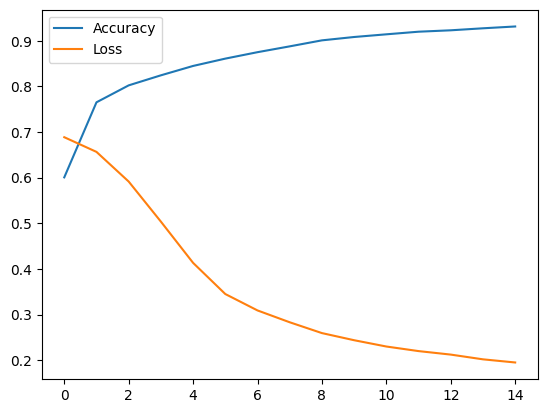

In [ ]:
## We can also visualise how the loss has reduced and score has been improved
plt.plot(model.history.history['accuracy'],label='Accuracy')
plt.plot(model.history.history['loss'],label='Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtest_tf1,ytest_encoded,batch_size=500)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.8917 - loss: 0.2772


[0.2789914608001709, 0.8903999924659729]

## Model Generalization Analysis

The neural network achieved approximately **92% training accuracy** and **89% test accuracy**, resulting in a small generalization gap of around **3%**.

This small gap indicates that:
- The model has learned meaningful patterns from the training data.
- Overfitting is well controlled through the use of **dropout regularization** and appropriate model complexity.
- The model generalizes well to unseen data.

A low difference between training and test accuracy suggests a good **bias–variance tradeoff**, meaning the model is neither underfitting nor overfitting. This makes the model reliable and robust for sentiment prediction on new reviews.

Overall, the model demonstrates strong generalization capability, which is desirable for real-world NLP applications.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [ ]:
pred_nn=model.predict(xtest_tf1)
pred_nn

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step


array([[0.09063878],
       [0.13049132],
       [0.9793336 ],
       ...,
       [0.01270572],
       [0.9311578 ],
       [0.30748883]], dtype=float32)

In [ ]:
ypred=(pred_nn>0.5).astype(int)
ypred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

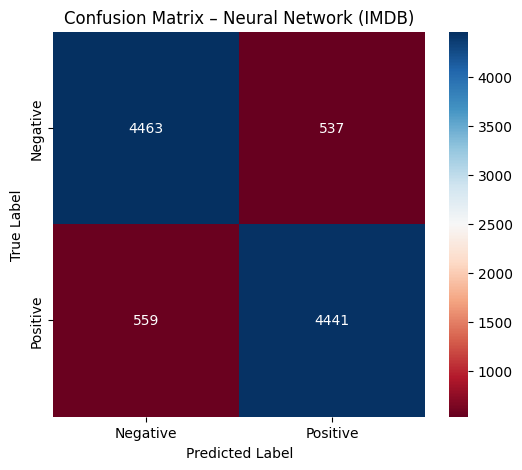

Accuracy : 0.8904
Precision: 0.892125351546806
Recall   : 0.8882
F1 Score : 0.8901583483664061

Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      5000
    Positive       0.89      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Compute confusion matrix
cm = confusion_matrix(ytest_encoded, ypred)

#  Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='RdBu',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Neural Network (IMDB)')
plt.show()

#  Print evaluation metrics
print("Accuracy :", accuracy_score(ytest_encoded, ypred))
print("Precision:", precision_score(ytest_encoded, ypred))
print("Recall   :", recall_score(ytest_encoded, ypred))
print("F1 Score :", f1_score(ytest_encoded, ypred))

#  Detailed classification report
print("\nClassification Report:\n")
print(classification_report(
    ytest_encoded,
    ypred,
    target_names=['Negative', 'Positive']
))


## Confusion Matrix Interpretation

The confusion matrix provides a detailed breakdown of the model’s predictions against the true sentiment labels.

- **True Negatives (4463):**  
  These are reviews that were actually negative and correctly classified as negative by the model.

- **False Positives (537):**  
  These are reviews that were actually negative but incorrectly predicted as positive.  
  This indicates cases where the model slightly overestimated positive sentiment.

- **False Negatives (559):**  
  These are reviews that were actually positive but incorrectly predicted as negative.  
  This shows instances where positive sentiment was missed by the model.

- **True Positives (4441):**  
  These are reviews that were actually positive and correctly classified as positive.

Overall, the confusion matrix shows that the model performs well for both classes, with a high number of correct predictions and a balanced distribution of errors. This indicates that the model does not favor one class significantly over the other.


## Model Comparison Interpretation

The table compares multiple machine learning and neural network models on the IMDB sentiment analysis task using Accuracy, Precision, Recall, and F1-score.

### Key Observations
- **Logistic Regression (baseline)** shows strong performance with an accuracy close to 89%, indicating that linear models are highly effective for TF-IDF–based text data.
- **Naive Bayes** and **Random Forest** perform relatively weaker, reflecting their limitations with high-dimensional sparse features.
- Enhancing Logistic Regression with **n-grams** improves performance:
  - Models using **(1,2)** and **(1,3)** n-grams achieve higher accuracy and F1-scores, demonstrating the importance of contextual information in sentiment detection.
- **SVM** performs competitively but does not significantly outperform Logistic Regression.
- **XGBoost** underperforms compared to linear models, likely due to the sparsity and dimensionality of TF-IDF vectors.

### Best Performing Model
- The **TF-IDF tuned model** achieves the best overall performance:
  - Accuracy: **90.05%**
  - Precision: **89.61%**
  - Recall: **90.60%**
  - F1-score: **90.10%**
- This model maintains a strong balance between precision and recall, making it the most reliable among all evaluated models.

### Neural Network Performance
- The **final neural network model** demonstrates good generalization with balanced precision and recall.
- However, it does not outperform the best TF-IDF–based linear models, which is expected for sparse text representations.

### Overall Conclusion
- **TF-IDF with a tuned Logistic Regression model** emerges as the most effective and computationally efficient approach for this sentiment analysis task.
- The comparison highlights that model performance depends more on **feature representation and tuning** than on model complexity.
